In [91]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import scipy.fft as fft
import scipy.stats as st
import xarray as xr

### What is the windowing method?

1. Seperate time series into subsections (possibly with overlap)
2. Multiply each window by a window function (usually Hanning)
3. Take the power Spectrum of each window
4. Average the windows together

The main purpose of doing this is to increase the number of degrees of freedom in our estimate 

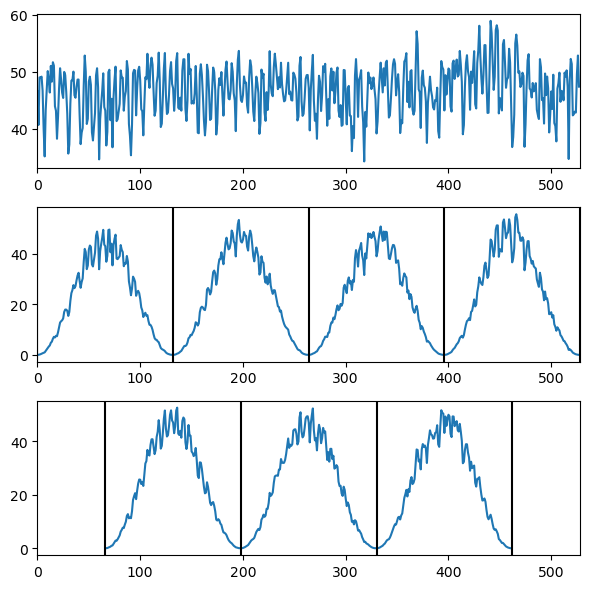

In [96]:
ds=xr.open_dataset('../data/pr_wtr.eatm.mon.mean.nc')
h=np.hanning(180)

pr=ds.pr_wtr.data[:-11,36,0]
hr=np.tile(sig.windows.hann(132),4)
hrh=np.hstack([np.nan*np.zeros(66),hr[:-132],np.nan*np.zeros(66)])
k=np.arange(0,528)

plt.figure(0,figsize=(6,6))

plt.subplot(3,1,1)
plt.plot(k,pr)
plt.xlim([0,528])

plt.subplot(3,1,2)
plt.plot(k,pr*hr)
plt.xlim([0,528])
for i in range(0,5):
    plt.axvline(i*132,color='k')

plt.subplot(3,1,3)
plt.plot(k,pr*hrh)
plt.xlim([0,528])
for i in range(0,5):
    plt.axvline(66+i*132,color='k')


plt.tight_layout()


### Where does the factor of 8/3 come from?

- the Hanning window does not keep the amplitude of our signal constant (see plot below)
- to see how much it changes the signal, consider that if compute the spectrum after windowing, we will have an extra factor of $$h^2/n$$ where $n$ is the number of points in the window. For the Hanning window this works out to be 8/3. 

0.9900000000000001


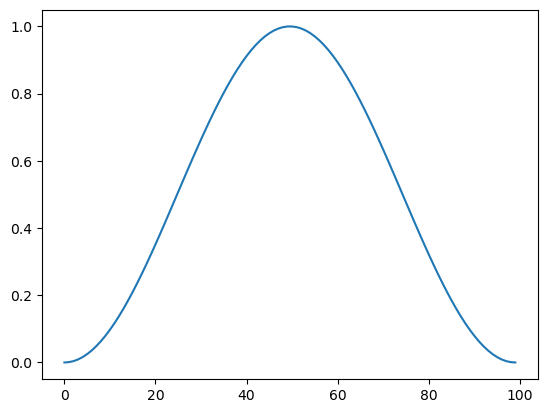

In [93]:
h=np.hanning(100)
plt.plot(h)
print(np.sum(h**2)/100/(3/8))

5000
0.2710850306818169 39.49789020520721


/tmp/ipykernel_3539/3122825422.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  for i in range(1,N): x[i]=x[i-1]*np.exp(-dt/tau)+np.sqrt(dt)*np.random.randn(1)


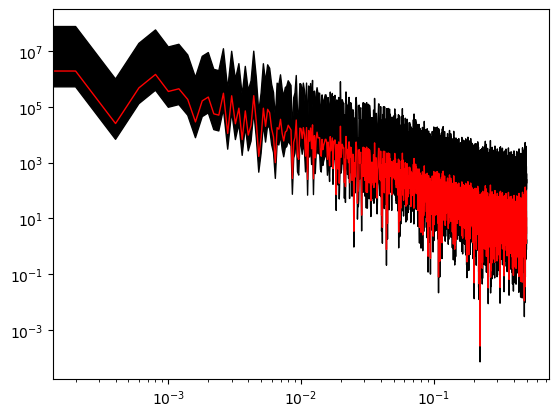

In [94]:
dt=0.01; tau=1; N=int(50/dt); print(N)
x=np.zeros(N)
# Remember this?
for i in range(1,N): x[i]=x[i-1]*np.exp(-dt/tau)+np.sqrt(dt)*np.random.randn(1)
nu=2; alpha=0.05; Cu=nu/st.chi2.ppf(1-alpha/2,df=nu); Cl=nu/st.chi2.ppf(alpha/2,df=nu)
print(Cu,Cl)

X=fft.fftshift(fft.fft(x))
P=np.abs(X)**2
f=fft.fftshift(fft.fftfreq(len(X)))

plt.fill_between(f,P*Cu,P*Cl,color='k')
plt.plot(f,P,'r',linewidth=1)
plt.yscale('log')
plt.xscale('log')


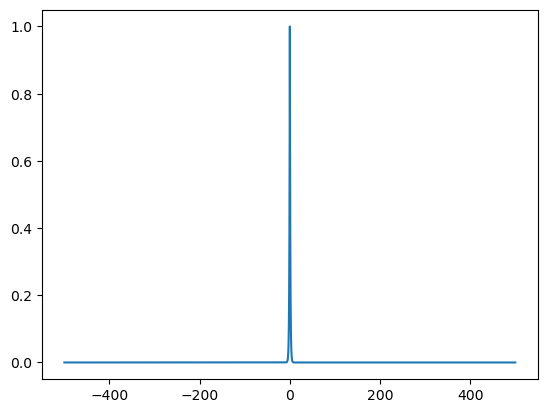

In [101]:
t=np.arange(0,1e3,1e-3)
t=t-t[5*10**5+1]
C=np.exp(-np.abs(t))
plt.plot(t,C)


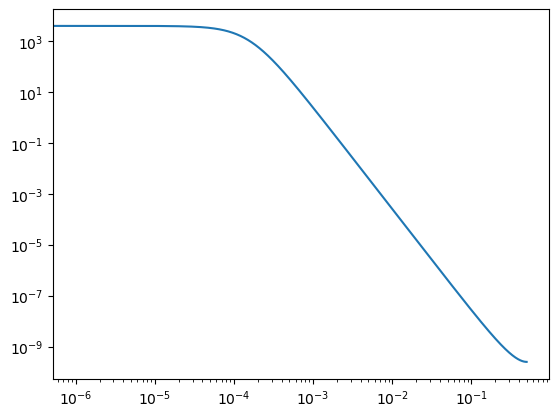

In [105]:
s=fft.fftfreq(len(C))
plt.loglog(fft.fftshift(s),fft.fftshift(np.abs(fft.fft(C))**2)*1e-3)